# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in `figures.py`. Figures are saved in PDF format in the `figures/` folder.


# Contents
* [Libraries and variables](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. Wright-Fisher simulation and mutational effects inference](#simulation)
    * [Figure 2. MPL is more consistent across replicates than current methods](#performance)
    * [Figure 3. Visualizations of MPL_DMS](#visualization)

## Libraries and variables<a class = "anchor" id = "package"></a>

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm

import warnings

import figures as figs

from importlib import reload

Figures below were produced using the following packages:
python == 3.7.6 (default, Dec 27 2019, 09:51:07) 
[Clang 11.0.0 (clang-1100.0.33.16)]
numpy == 1.21.6
scipy == 1.7.3
pandas == 1.3.5
matplotlib == 3.5.1
seaborn == 0.9.0


## Figures and data analysis<a class = "anchor" id = "figure"></a>

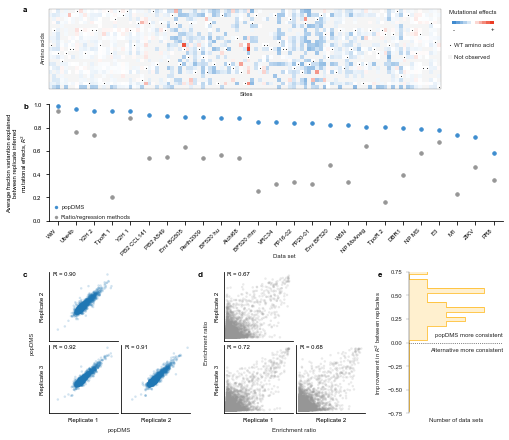

In [2]:
reload(figs)
figs.fig_methods_comparison()
plt.show()

In [39]:
df_merged = pd.read_csv('./data/epistasis/merged_table.csv').dropna()
print(st.pearsonr(df_merged['function_score'], df_merged['epistasis_MPL_transfer']))
print(st.pearsonr(df_merged['function_score'], df_merged['epistasis_paper']))

PearsonRResult(statistic=0.10549151931292107, pvalue=4.8090040108711873e-35)
PearsonRResult(statistic=-0.145342326206706, pvalue=2.947697788320587e-65)


### Figure 1. Wright-Fisher simulation and mutational effects inference<a class = "anchor" id = "simulation"></a>

/Users/zhenchenhong/Downloads/DMS_github_0628/paper-DMS-inference/figures.py:932: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


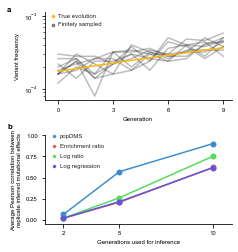

In [3]:
reload(figs)
figs.FIG1_SIMULATION_FINITE_SAMPLING()
plt.show()

### Figure 2. MPL is more consistent across replicates than current methods<a class = "anchor" id = "performance"></a>

In [2]:
reload(figs)
figs.FIG2_METHODS_COMPARISON()
plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'numpy.str_'

### Figure X. Selection coefficients vs. Preferences<a class = "anchor" id = "Sele_Pref_correlation"></a>

How about putting this in Figure2 as 2d?

In [ ]:
df_sele = pd.read_csv('./output/selection_coefficients/HIV Env BG505.csv.gz', compression = 'gzip')
df_sele = df_sele[df_sele['amino_acid']!='*']
df_sele

df_pref = pd.read_csv('./output/merged_preference/HIV BG505.csv.gz', compression = 'gzip')
df_pref

df_merged = pd.merge(df_pref[['site', 'amino_acid', 'average']], df_sele[['site', 'amino_acid', 'joint']], on=['site', 'amino_acid'])
print('Pearson correlation: ', st.pearsonr(df_merged['average'], df_merged['joint'])[0].round(2))
print('Spearman correlation: ', st.spearmanr(df_merged['average'], df_merged['joint'])[0].round(2))

df_merged.plot.scatter('average', 'joint', alpha = 0.3)
plt.xlabel('Preference')
plt.ylabel('Selection coefficient')
plt.title('HIV Env BG505 selection coefficients vs. preference')
plt.show()

### Figure XX. Selection coefficients/Preferences vs. Natural frequency<a class = "anchor" id = "Sele_pref_natual_freq"></a>

In [ ]:
df_sele = pd.read_csv('./output/selection_coefficients/WSN.csv.gz')
df_freq = pd.read_csv('./data/raw_data/H1_HumanSwine_alignment_frequencies.txt', sep="\t")
df_freq = df_freq.drop(['SITE_ENTROPY', 'WT_AA'], axis=1)
df_freq.columns = ['site']+[i[-1] for i in df_freq.columns[1:]]
df_pref = pd.read_csv('./output/merged_preference/WSN.csv.gz', compression = 'gzip')
df_pref

site_list = []
amino_acid = []
freq_list = []

for i in df_freq['site'].tolist():
    site_list += [i]*20
    amino_acid += df_freq.columns[1:].tolist()

freq_list = df_freq[df_freq.columns[1:]].values.flatten()
df_freq_merged = pd.DataFrame(columns=['site', 'amino_acid', 'frequency'])
df_freq_merged['site'] = site_list
df_freq_merged['amino_acid'] = amino_acid
df_freq_merged['frequency'] = freq_list

df_merged = pd.merge(df_sele, df_freq_merged, on = ['site', 'amino_acid'])
df_merged = pd.merge(df_merged, df_pref, on = ['site', 'amino_acid'])
df_merged = df_merged.rename(columns={'rep_1_x': 'rep_1_sele', 'rep_2_x': 'rep_2_sele', 'rep_3_x': 'rep_3_sele', 'joint': 'sele_joint',
                          'rep_1_y': 'rep_1_pref', 'rep_2_y': 'rep_2_pref', 'rep_3_y': 'rep_3_pref', 'average': 'pref_avg'})
print('Pearson correlation(selection coefficient vs. natural frequency):', st.pearsonr(df_merged['frequency'], df_merged['sele_joint'])[0])
print('Spearman correlation(selection coefficient vs. natural frequency):', st.spearmanr(df_merged['frequency'], df_merged['sele_joint'])[0])

df_merged.plot.scatter(x='frequency', y='sele_joint', alpha = 0.3)

plt.title('MPL vs. natural frequency')
plt.xlabel('natural frequency')
plt.ylabel('joint selection coefficients')
plt.show()
print('Pearson correlation(preference vs. natural frequency):', st.pearsonr(df_merged['frequency'], df_merged['pref_avg'])[0])
print('Spearman correlation(preference vs. natural frequency):', st.spearmanr(df_merged['frequency'], df_merged['pref_avg'])[0])

df_merged.plot.scatter(x='frequency', y='pref_avg', alpha = 0.3)
plt.title('Preference vs. natural frequency')
plt.xlabel('natural frequency')
plt.ylabel('aveerage preference')
plt.show()


### Figure 3. Visualizations of MPL_DMS<a class = "anchor" id = "visualization"></a>

LogomakerError: some matrix elements are not finite. Set allow_nan=True to allow this.

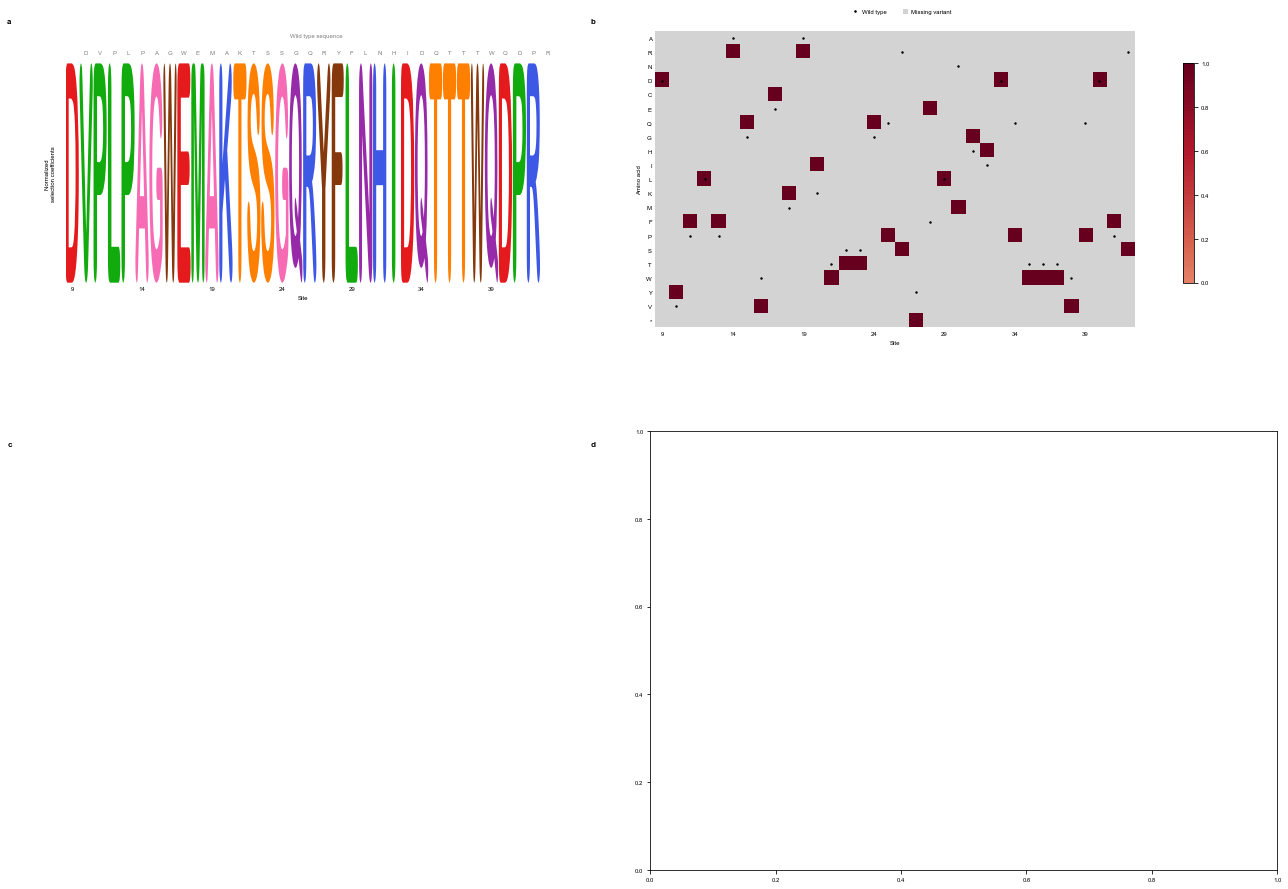

<Figure size 432x288 with 0 Axes>

In [3]:
reload(figs)
figs.FIG3_VISUALIZATION()
plt.show()

### Figure4. Visualizations of Epistasis<a class = "anchor" id = "visualization"></a>

In [ ]:
reload(figs)
figs.FIG4_VISUALIZATION()

### Supplemental figure 1. Epistasis scatter<a class = "anchor" id = "epistasis supp"></a>

In [ ]:
reload(figs)
figs.SUPPFIG1_EPISTASIS()